# Stock Prices Prediction Using Keras Long Term Short Memory

In [4]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Importing the training set
dataset_train = pd.read_csv('/content/Tata-Global.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [6]:
dataset_train.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [8]:
dataset_train.shape

(2035, 8)

In [9]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [10]:
dataset_train.shape

(2035, 8)

In [11]:
training_set_scaled.shape

(2035, 1)

In [12]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [13]:
dataset_train.shape

(2035, 8)

In [14]:
X_train.shape

(1975, 60)

In [15]:
X_train.shape[0]

1975

In [16]:
X_train.shape[1]

60

In [17]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

In [18]:
X_train.shape

(1975, 60, 1)

In [19]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [20]:
input_shape = (X_train.shape[1], 1)

In [21]:
input_shape

(60, 1)

In [24]:
X_train.shape[1]

60

In [25]:
# Initialising the RNN
regressor = Sequential()
# units : 50, 100, 200, 256, 512, 1024
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [26]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [27]:

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [28]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
#regressor.add(Dropout(0.2))


In [29]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)



Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 14s 143ms/step - loss: 0.0204
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - loss: 0.0058
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - loss: 0.0033
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - loss: 0.0033
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - loss: 0.0033
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 12s 141ms/step - loss: 0.0025
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - loss: 0.0022
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - loss: 0.0018
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 12s 142ms/step - loss: 0.0020
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 14s 235ms/step - loss: 0.0021


In [31]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('/content/tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [32]:
dataset_test.shape

(16, 8)

In [33]:
real_stock_price

array([[220.1 ],
       [221.1 ],
       [229.45],
       [230.3 ],
       [237.7 ],
       [237.1 ],
       [229.7 ],
       [226.25],
       [215.  ],
       [215.  ],
       [215.5 ],
       [208.  ],
       [217.  ],
       [223.5 ],
       [230.  ],
       [234.55]])

In [34]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

In [35]:
dataset_total

,Open
0,234.05
1,234.55
2,240.00
3,233.30
4,233.55
...,...
11,208.00
12,217.00
13,223.50
14,230.00


In [36]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [37]:
len(inputs)

76

In [38]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])

In [39]:
len(X_test)

16

In [40]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step


In [41]:
real_stock_price

array([[220.1 ],
       [221.1 ],
       [229.45],
       [230.3 ],
       [237.7 ],
       [237.1 ],
       [229.7 ],
       [226.25],
       [215.  ],
       [215.  ],
       [215.5 ],
       [208.  ],
       [217.  ],
       [223.5 ],
       [230.  ],
       [234.55]])

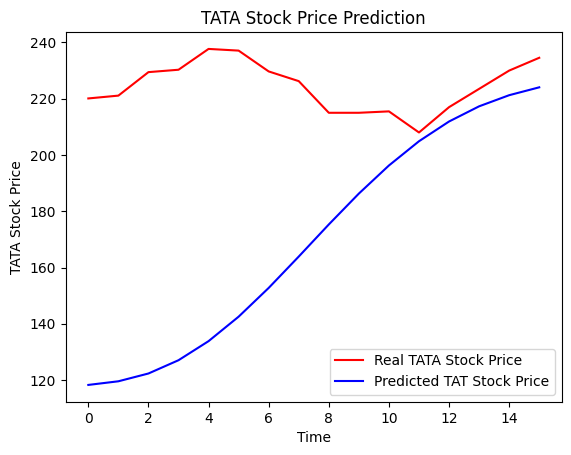

In [42]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TAT Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()